In [653]:
import pandas as pd
from pandas import datetime 
import matplotlib.pyplot as plt

In [654]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')
sales = pd.read_csv('Test.csv',index_col=0, parse_dates=[0], date_parser=parser )
sales.head()

,Toyota,Nissan,Ford
Month,,,
2021-01-01,10,200,30
2021-02-01,100,1600,1700
2021-03-01,10,200,30
2021-04-01,200,2100,200
2021-05-01,50,250,50


<AxesSubplot:xlabel='Month'>

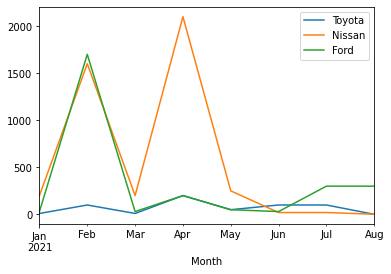

In [655]:
# Trend of sales
sales.plot()

In [656]:
sales_difference = sales.diff(periods=1)
sales_difference = sales_difference[1:]
sales_difference.head()

,Toyota,Nissan,Ford
Month,,,
2021-02-01,90.0,1400.0,1670.0
2021-03-01,-90.0,-1400.0,-1670.0
2021-04-01,190.0,1900.0,170.0
2021-05-01,-150.0,-1850.0,-150.0
2021-06-01,50.0,-230.0,-20.0


<AxesSubplot:xlabel='Month'>

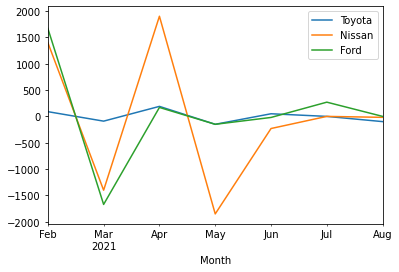

In [657]:
sales_difference.plot()

In [658]:
# Part 2
x = sales.values
# print(x)
x.size

train = x[0:6] # 6 data as train data 
test = x[6:] # 2 data as test data
predictions = []
# train.size
# test.size

In [659]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
model_ar = AutoReg(train,None)
model_ar_fit = model_ar.fit()

ValueError: shapes (6,3) and (6,3) not aligned: 3 (dim 1) != 6 (dim 0)

In [ ]:
prediction = model_ar_fit.predict(start=6, end=8)

In [ ]:
test

array([[100],
       [  1]], dtype=int64)

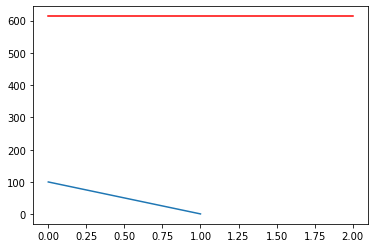

In [ ]:
plt.plot(test)
plt.plot(prediction,color='red')

In [ ]:
# ARIMA model

from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# p,d,q
# p = predicts taken to autoregressive model
# d = Integrated order, difference
# q = periods in moving avarage model
model_arima = ARIMA(train,order=(3,4,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

8.0


In [ ]:
predictionsOfArima = model_arima_fit.predict(steps=9)[0]
predictionsOfArima

array([    0.        ,    29.9999319 ,  3213.14447953,  7088.12057439,
       11620.48725501, 19352.75140542])

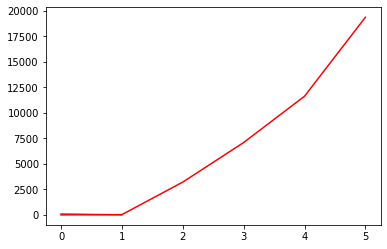

In [ ]:
plt.plot(test)
plt.plot(predictionsOfArima,color='red')

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 101.51125854150501
(0, 0, 1) 99.67507522848344
(0, 0, 2) 99.83772659095297
(0, 0, 3) 101.04629214198022
(0, 0, 4) 104.68038332634411
(0, 1, 0) 89.57824212553344
(0, 1, 1) 87.85482990074078
(0, 1, 2) 88.4435109149392
(0, 1, 3) 90.43396976951328
(0, 1, 4) 91.93121024058067
(0, 2, 0) 77.69079864932796
(0, 2, 1) 75.45364026815862
(0, 2, 2) 75.16825363975627
(0, 2, 3) 75.78669262893736
(0, 2, 4) 77.22732194939596
(0, 3, 0) 63.17772922593132
(0, 3, 1) 61.484044041160004
(0, 3, 2) 60.17836338182549
(0, 3, 3) 59.82278613677556
(0, 3, 4) 60.37237748927683
(0, 4, 0) 45.7046373579199
(0, 4, 1) 45.17905488827412
(0, 4, 2) 44.659946915848266
(0, 4, 3) 44.4458061701736
(0, 4, 4) 44.70073437811731
(1, 0, 0) 100.8028187947321
(1, 0, 1) 100.74232915776075
(1, 0, 2) 101.70449648507011
(1, 0, 3) 104.55623835357568
(1, 0, 4) 107.33836060017804
(1, 1, 0) 87.56209524631183
(1, 1, 1) 196.4110942219284
(1, 1, 2) 90.30675786007855
(1, 1, 3) 92.34353705217227
(1, 1, 4) 94.05138280308853
(1, 2, 0) 72.7